In [22]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# Load .env environment variables
load_dotenv("../../api_keys.env")

True

In [24]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)

str

In [25]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [26]:
# Format current date as ISO format
end_date = pd.Timestamp("2021-04-30", tz="America/New_York").isoformat()
start_date = pd.Timestamp("2019-11-30", tz="America/New_York").isoformat()

In [27]:
# Set the tickers
tickers = ["SPY", "LQD", "UNG", "AGG", "VNQ"]

In [28]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [29]:
etfs = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
etfs.index = etfs.index.date

In [30]:
eft_closing_prices_df = pd.DataFrame()

eft_closing_prices_df["LQD"] = etfs["LQD"]["close"]
eft_closing_prices_df["AGG"] = etfs["AGG"]["close"]
eft_closing_prices_df["SPY"] = etfs["SPY"]["close"]
eft_closing_prices_df["UNG"] = etfs["UNG"]["close"]
eft_closing_prices_df["VNQ"] = etfs["VNQ"]["close"]


In [31]:
eft_closing_prices_df.head()

,LQD,AGG,SPY,UNG,VNQ
2019-12-02,127.05,112.48,311.60,17.950,91.65
2019-12-03,128.05,113.02,309.47,18.730,92.25
2019-12-04,127.87,112.80,311.47,18.510,92.63
2019-12-05,127.75,112.69,312.04,18.530,92.69
2019-12-06,127.67,112.54,314.82,18.025,92.87


In [32]:
# Creating a column for 20 day moving average
eft_closing_prices_df["MovAvg20dLQD"] = eft_closing_prices_df["LQD"].rolling(window=20).mean()
eft_closing_prices_df["MovAvg20dPFE"] = eft_closing_prices_df["AGG"].rolling(window=20).mean()
eft_closing_prices_df["MovAvg20dSPY"] = eft_closing_prices_df["SPY"].rolling(window=20).mean()
eft_closing_prices_df["MovAvg20dUNG"] = eft_closing_prices_df["UNG"].rolling(window=20).mean()
eft_closing_prices_df["MovAvg20dVNQ"] = eft_closing_prices_df["VNQ"].rolling(window=20).mean()

In [33]:
# Creating a column for 20 days stadard deviation 
eft_closing_prices_df["StDevLQD"] = eft_closing_prices_df["LQD"].rolling(window=20).std()
eft_closing_prices_df["StDevPFE"] = eft_closing_prices_df["AGG"].rolling(window=20).std()
eft_closing_prices_df["StDevSPY"] = eft_closing_prices_df["SPY"].rolling(window=20).std()
eft_closing_prices_df["StDevUNG"] = eft_closing_prices_df["UNG"].rolling(window=20).std()
eft_closing_prices_df["StDevVNQ"] = eft_closing_prices_df["VNQ"].rolling(window=20).std()

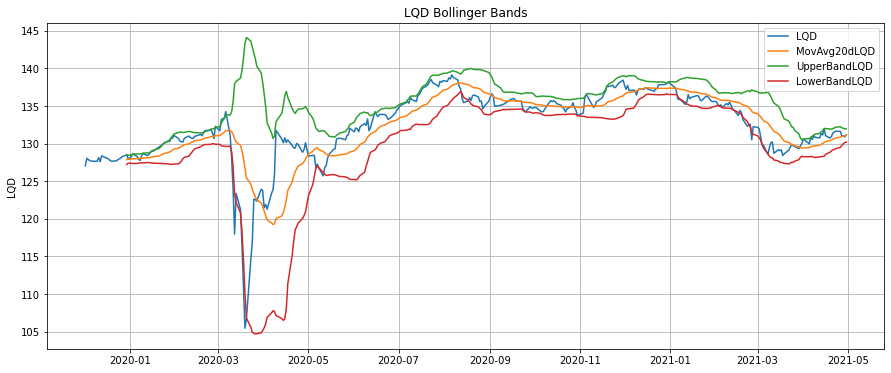

In [21]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandLQD"] = eft_closing_prices_df["MovAvg20dLQD"] + (eft_closing_prices_df["StDevLQD"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandLQD"] = eft_closing_prices_df["MovAvg20dLQD"] - (eft_closing_prices_df["StDevLQD"] * 2)

# Plotting
lqd_plot = eft_closing_prices_df[["LQD","MovAvg20dLQD","UpperBandLQD","LowerBandLQD"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("LQD Bollinger Bands")
plt.axis("tight")
plt.ylabel("LQD")

plt.savefig('lqd_plot.jpg')

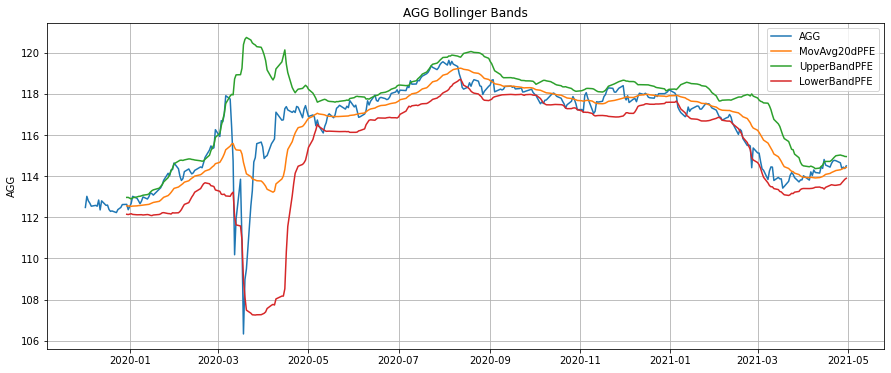

In [34]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandPFE"] = eft_closing_prices_df["MovAvg20dPFE"] + (eft_closing_prices_df["StDevPFE"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandPFE"] = eft_closing_prices_df["MovAvg20dPFE"] - (eft_closing_prices_df["StDevPFE"] * 2)

# Plotting
agg_plot = eft_closing_prices_df[["AGG","MovAvg20dPFE","UpperBandPFE","LowerBandPFE"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("AGG Bollinger Bands")
plt.axis("tight")
plt.ylabel("AGG")

plt.savefig('agg_plot.jpg')

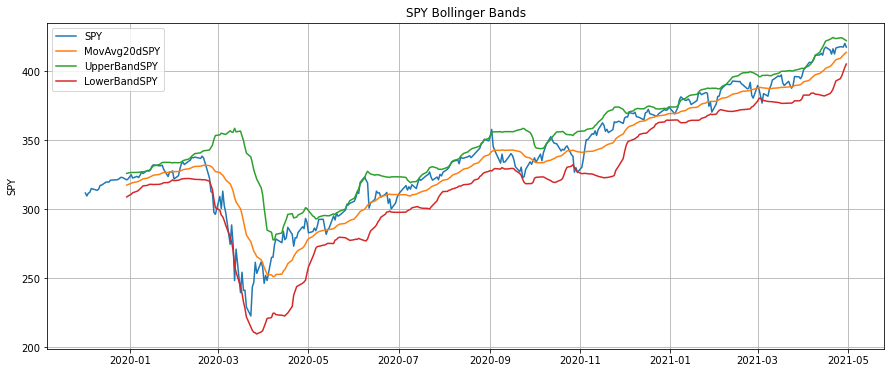

In [18]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandSPY"] = eft_closing_prices_df["MovAvg20dSPY"] + (eft_closing_prices_df["StDevSPY"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandSPY"] = eft_closing_prices_df["MovAvg20dSPY"] - (eft_closing_prices_df["StDevSPY"] * 2)

# Plotting
spy_plot = eft_closing_prices_df[["SPY","MovAvg20dSPY","UpperBandSPY","LowerBandSPY"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("SPY Bollinger Bands")
plt.axis("tight")
plt.ylabel("SPY")

plt.savefig('spy_plot.jpg')

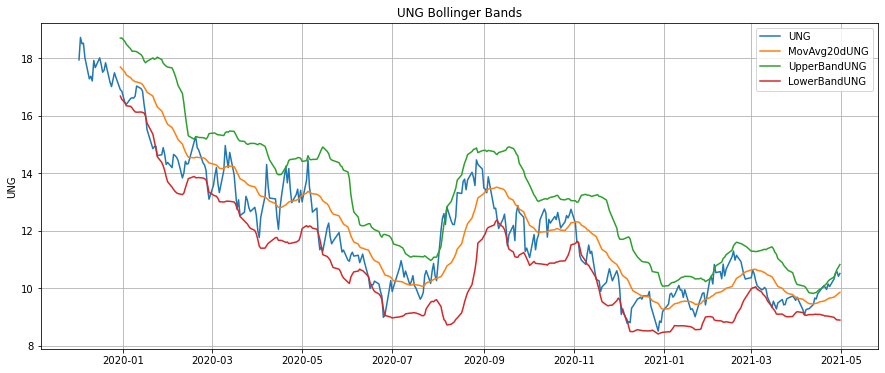

In [19]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandUNG"] = eft_closing_prices_df["MovAvg20dUNG"] + (eft_closing_prices_df["StDevUNG"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandUNG"] = eft_closing_prices_df["MovAvg20dUNG"] - (eft_closing_prices_df["StDevUNG"] * 2)

# Plotting
ung_plot = eft_closing_prices_df[["UNG","MovAvg20dUNG","UpperBandUNG","LowerBandUNG"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("UNG Bollinger Bands")
plt.axis("tight")
plt.ylabel("UNG")

plt.savefig('ung_plot.jpg')

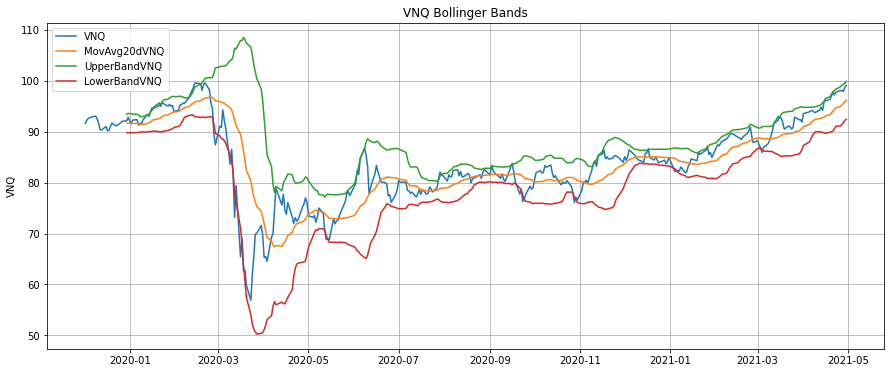

In [20]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandVNQ"] = eft_closing_prices_df["MovAvg20dVNQ"] + (eft_closing_prices_df["StDevVNQ"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandVNQ"] = eft_closing_prices_df["MovAvg20dVNQ"] - (eft_closing_prices_df["StDevVNQ"] * 2)

# Plotting
vnq_plot = eft_closing_prices_df[["VNQ","MovAvg20dVNQ","UpperBandVNQ","LowerBandVNQ"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("VNQ Bollinger Bands")
plt.axis("tight")
plt.ylabel("VNQ")

plt.savefig('vnq_plot.jpg')